<h1>Probabilistic approaches and Bayesian classification</h1>

In this notebook you will learn about:
- **Bayes’ Theorem** – theory and practical example  
- **Naive Bayes Classifier** – a simple yet powerful probabilistic model for classification as form of machine learning

## Bayes theorem

$$
P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)}
$$

- P(A): *Probability* of event (A), regardless of (B)
- P(B | A): *Probability* of observing (B) given that (A) is true
- P(B): *Probability* of event (B), regardless of (A)
- P(A | B): *Probability* of observing (A) given that (B) is true

## Bayes theorem example: Diagnostic Test for a Disease
- 1% of the total population has the disease
- 95% of infected individuals have a positive test - sensitivity
- 10% of healthy individuals have a positive test - false positive

In [1]:
# Set values from input
P_population_infected = 0.01
P_positive_given_infected = 0.95
P_positive_given_healty = 0.10

# Calculation of complementary probabilities
P_population_healty = 1 - P_population_infected
P_negative_given_infected = 1 - P_positive_given_infected
P_negative_given_healty = 1 - P_positive_given_healty

In [2]:
# Display input values in table

import pandas as pd

data = {
    "Event": [
        "Infected population",
        "Healthy population",
        "P(Positive | Infected)",
        "P(Negative | Infected)",
        "P(Positive | Healthy)",
        "P(Negative | Healthy)"
    ],
    "Probability": [
        P_population_infected,
        P_population_healty,
        P_positive_given_infected,
        P_negative_given_infected,
        P_positive_given_healty,
        P_negative_given_healty
    ]
}

df = pd.DataFrame(data)

df["Probability"] = df["Probability"].apply(lambda x: f"{x:.0%}")

styled_df = (df.style
    .hide(axis='index')
    .set_properties(**{'text-align': 'left'})
    .set_table_styles([{
        'selector': 'th',
        'props': [('text-align', 'left')]
    }])
)

styled_df

Event,Probability
Infected population,1%
Healthy population,99%
P(Positive | Infected),95%
P(Negative | Infected),5%
P(Positive | Healthy),10%
P(Negative | Healthy),90%


If test is positive what is the probability of individual actually being infected?

$$
P(Infected \mid Positive) = \frac{P(Positive \mid Infected) \, P(Infected)}{P(Positive)}
$$

In [3]:
# Calculate all positive tests
P_positive = (P_positive_given_infected * P_population_infected + P_positive_given_healty * P_population_healty)
print(f"Probability of positive test: {P_positive:.2%}") 

# Calculate probability of infected after positive test
P_infected_given_positive = (P_positive_given_infected * P_population_infected) / P_positive
print(f"Probability of infected individual after test was positive: {P_infected_given_positive:.2%}") 

Probability of positive test: 10.85%
Probability of infected individual after test was positive: 8.76%


<h2>Naive Bayes Classifier</h2>

- multiple classes ( C_1, C_2, ..., C_k )
- x - feature(attribute) vector of object

$$
P(C_i \mid x) = \frac{P(x \mid C_i) \, P(C_i)}{P(x)}
$$

- the goal of a classifier is to select the class that has the **highest probability**

$$
\hat{C} = \arg\max_i \, P(C_i \mid x)
$$


- however in practice, it is often difficult to compute P(x | C_i ), because \(x\) may have many features

- to simplify, we make a **“naive” assumption**: **All features are conditionally independent**

- although this assumption is often **not completely true** in the real world, it **works very well**

- after assumption the resulting formula becomes:

$$
\hat{C} = \arg\max_i \, P(C_i) \prod_{j=1}^{n} P(x_j \mid C_i)
$$

## Naive Bayes Example: Topic Classification

- we will apply Naive Bayes Classifier to classify documents into categories

Algorithm
- tries to learn **which words typically appear in which topic**
- uses this information to predict the topic of a new document

Categories:
- sports/hockey
- sports/baseball
- talk/politics/guns
- talk/ppolitics/mideast

Number of loaded documents: 3843
Kategories: ['rec.sport.baseball', 'rec.sport.hockey', 'talk.politics.guns', 'talk.politics.mideast']
Accuracy: 0.98


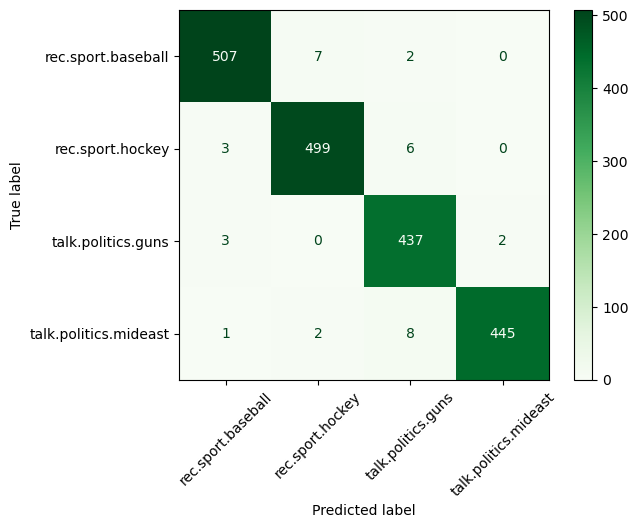

In [4]:
#Import
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

#Load data
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'talk.politics.guns', 'talk.politics.mideast']
data = fetch_20newsgroups(subset='all', categories=categories)

#Print info
print(f"Number of loaded documents: {len(data.data)}")
print(f"Kategories: {data.target_names}")

#Convert to matrix
#row = document
#column = unique word
#value on specific row and column = number representing how many times word appeared in document
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data.data)
y = data.target

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

#Train the naive bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

#Predict
y_pred = model.predict(X_test)

#Evaluate
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

#Visualise
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap='Greens', xticks_rotation=45)
